In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h1>4. Machine Learning Models </h1>

<h2> 4.1 Reading data from file and storing into sql table </h2>

In [3]:
#Creating db file from csv
if not os.path.isfile('train.db'):
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','300_x','301_x','302_x','303_x','304_x','305_x','306_x','307_x','308_x','309_x','310_x','311_x','312_x','313_x','314_x','315_x','316_x','317_x','318_x','319_x','320_x','321_x','322_x','323_x','324_x','325_x','326_x','327_x','328_x','329_x','330_x','331_x','332_x','333_x','334_x','335_x','336_x','337_x','338_x','339_x','340_x','341_x','342_x','343_x','344_x','345_x','346_x','347_x','348_x','349_x','350_x','351_x','352_x','353_x','354_x','355_x','356_x','357_x','358_x','359_x','360_x','361_x','362_x','363_x','364_x','365_x','366_x','367_x','368_x','369_x','370_x','371_x','372_x','373_x','374_x','375_x','376_x','377_x','378_x','379_x','380_x','381_x','382_x','383_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y','300_y','301_y','302_y','303_y','304_y','305_y','306_y','307_y','308_y','309_y','310_y','311_y','312_y','313_y','314_y','315_y','316_y','317_y','318_y','319_y','320_y','321_y','322_y','323_y','324_y','325_y','326_y','327_y','328_y','329_y','330_y','331_y','332_y','333_y','334_y','335_y','336_y','337_y','338_y','339_y','340_y','341_y','342_y','343_y','344_y','345_y','346_y','347_y','348_y','349_y','350_y','351_y','352_y','353_y','354_y','355_y','356_y','357_y','358_y','359_y','360_y','361_y','362_y','363_y','364_y','365_y','366_y','367_y','368_y','369_y','370_y','371_y','372_y','373_y','374_y','375_y','376_y','377_y','378_y','379_y','380_y','381_y','382_y','383_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

180000 rows
360000 rows
540000 rows


In [ ]:

def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except sqlite3.Error as e:
        print(e)

    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall()
    print(tables[0][0])
    return(len(tables))

In [4]:
read_db = 'train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
data


In [ ]:
# Sampling points from large dataset
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        

        # for selecting random points
        data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 100001;", conn_r)
        print("successfully sampled the 100k data points")
        conn_r.commit()
        conn_r.close()

successfully sampled the 100k data points


In [5]:
# 1. Drop the bad first row if it has "is_duplicate"
if data.iloc[0]["is_duplicate"] == "is_duplicate":
    data = data.drop(data.index[0]).reset_index(drop=True)

# 2. Extract target column safely
y_true = pd.to_numeric(data["is_duplicate"], errors="coerce").astype(int)

# 3. Drop unwanted columns
cols_to_drop = [col for col in ["Unnamed: 0", "id", "index", "is_duplicate"] if col in data.columns]
X = data.drop(cols_to_drop, axis=1)

print("Shapes:", X.shape, y_true.shape)


Shapes: (100001, 794) (100001,)


<h2> 4.3 Random train test split( 70:30) </h2>

In [7]:
# 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_true,
    test_size=0.3,        # 30% test
    random_state=42,      # reproducibility
    stratify=y_true       # keeps class balance same in train & test
)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

Train shapes: (70000, 794) (70000,)
Test shapes: (30001, 794) (30001,)


In [8]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6311857142857142 Class 1:  0.3688142857142857
---------- Distribution of output variable in train data ----------
Class 0:  0.36882103929869003 Class 1:  0.36882103929869003


In [7]:
def plot_confusion_matrix(test_y, predict_y):
    # ensure numpy int arrays
    test_y = np.array(test_y).astype(int)
    predict_y = np.array(predict_y).astype(int)

    C = confusion_matrix(test_y, predict_y)
    
    A = ((C.T) / (C.sum(axis=1) + 1e-15)).T  # recall
    B = C / (C.sum(axis=0) + 1e-15)          # precision
    
    labels = np.unique(np.concatenate([test_y, predict_y]))

    plt.figure(figsize=(20,4))
    cmap = sns.light_palette("blue")

    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.title("Confusion Matrix")

    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.title("Precision Matrix")

    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.title("Recall Matrix")

    plt.show()


<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8846657920083838


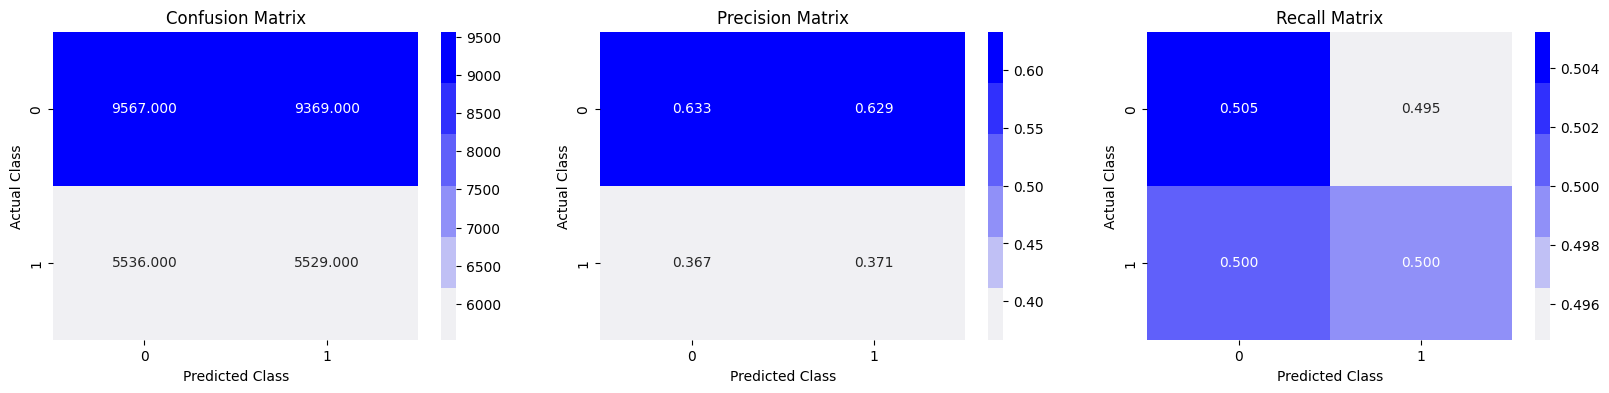

In [24]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.4 GBDT with hyperparameter tuning </h2>

In [25]:
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier(max_iter=100, random_state=42)
clf.fit(X_train, y_train)

predict_y_train = clf.predict_proba(X_train)
predict_y_test = clf.predict_proba(X_test)

print("Train log loss:", log_loss(y_train, predict_y_train))
print("Test log loss:", log_loss(y_test, predict_y_test))




Train log loss: 0.2881120963086981
Test log loss: 0.3301356793207951


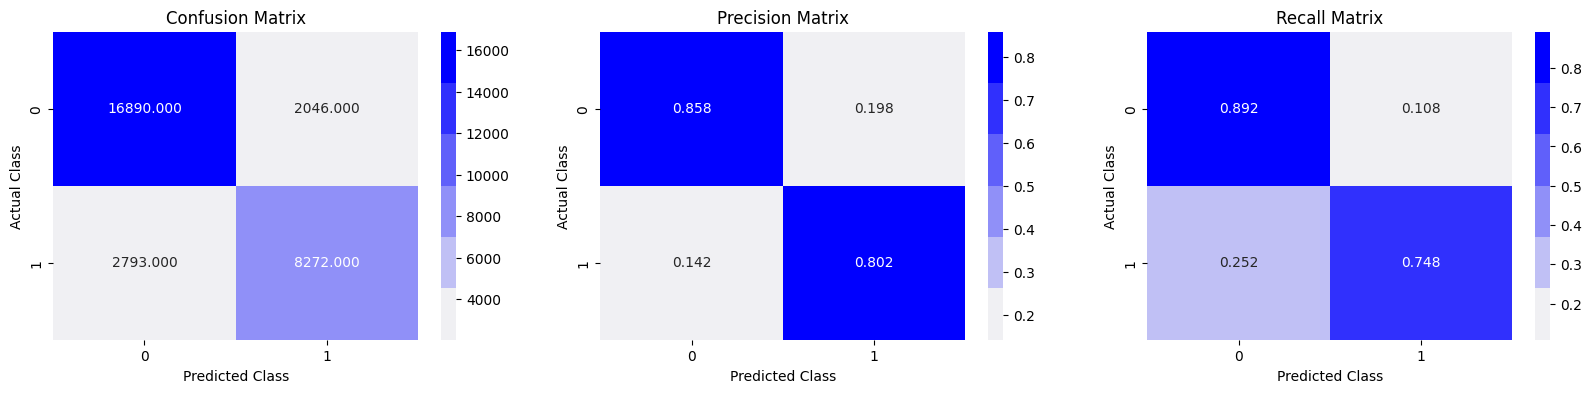

In [27]:
predicted_y = np.argmax(predict_y_test, axis=1)
plot_confusion_matrix(y_test,predicted_y)
plt.show()

<h2> 4.5 XGBoost </h2>

In [ ]:
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        

        # for selecting random points
        data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 30000;", conn_r)
        print("successfully sampled the 100k data points")
        conn_r.commit()
        conn_r.close()

successfully sampled the 100k data points


In [6]:
# 1. Drop the bad first row if it has "is_duplicate"
if data.iloc[0]["is_duplicate"] == "is_duplicate":
    data = data.drop(data.index[0]).reset_index(drop=True)

# 2. Extract target column safely
y_true = pd.to_numeric(data["is_duplicate"], errors="coerce").astype(int)

# 3. Drop unwanted columns
cols_to_drop = [col for col in ["Unnamed: 0", "id", "index", "is_duplicate"] if col in data.columns]
X = data.drop(cols_to_drop, axis=1)

print("Shapes:", X.shape, y_true.shape)


Shapes: (30000, 794) (30000,)


In [8]:
# 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_true,
    test_size=0.3,        # 30% test
    random_state=42,      # reproducibility
    stratify=y_true       # keeps class balance same in train & test
)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

Train shapes: (21000, 794) (21000,)
Test shapes: (9000, 794) (9000,)


In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [15]:
import xgboost as xgb
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.02,
    'max_depth': 4
}



# Convert data to DMatrix format
d_train = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
d_test = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)


watchlist = [(d_train, 'train'), (d_test, 'valid')]

# Train the model
bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

# Predictions
predict_y = bst.predict(d_test)

# Compute log loss
print("The test log loss is:", log_loss(y_test, predict_y))


[0]	train-logloss:0.65007	valid-logloss:0.65007
[10]	train-logloss:0.58694	valid-logloss:0.58663
[20]	train-logloss:0.54154	valid-logloss:0.54110
[30]	train-logloss:0.50786	valid-logloss:0.50755
[40]	train-logloss:0.48140	valid-logloss:0.48122
[50]	train-logloss:0.46080	valid-logloss:0.46081
[60]	train-logloss:0.44458	valid-logloss:0.44468
[70]	train-logloss:0.43137	valid-logloss:0.43160
[80]	train-logloss:0.42063	valid-logloss:0.42104
[90]	train-logloss:0.41178	valid-logloss:0.41238
[100]	train-logloss:0.40433	valid-logloss:0.40526
[110]	train-logloss:0.39807	valid-logloss:0.39925
[120]	train-logloss:0.39310	valid-logloss:0.39455
[130]	train-logloss:0.38848	valid-logloss:0.39037
[140]	train-logloss:0.38426	valid-logloss:0.38675
[150]	train-logloss:0.38047	valid-logloss:0.38368
[160]	train-logloss:0.37676	valid-logloss:0.38070
[170]	train-logloss:0.37351	valid-logloss:0.37822
[180]	train-logloss:0.37051	valid-logloss:0.37603
[190]	train-logloss:0.36766	valid-logloss:0.37392
[200]	train

Total number of data points : 9000


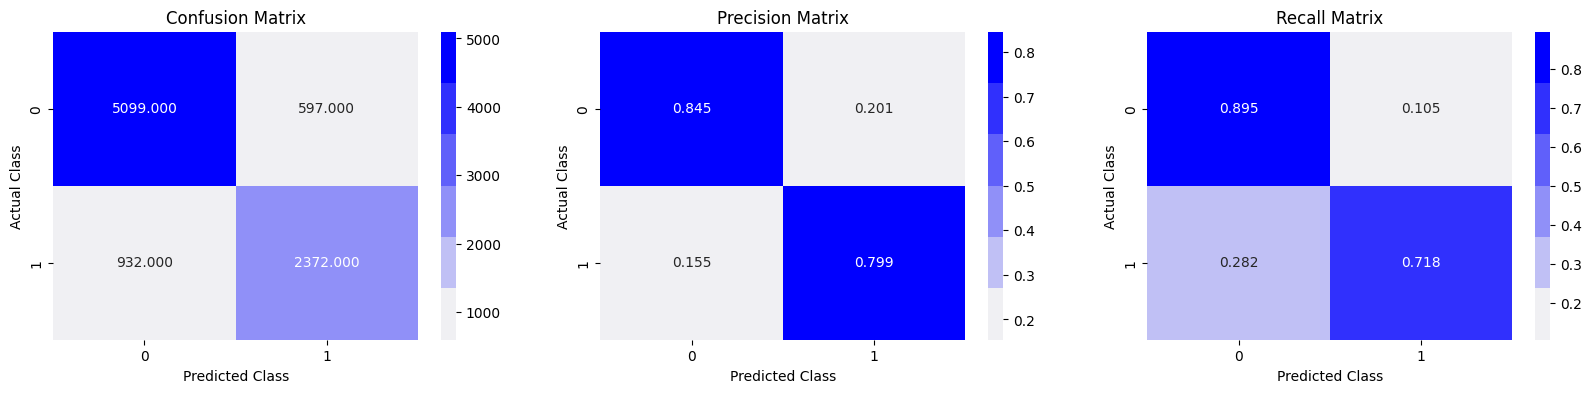

In [16]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h1> 5. Assignments </h1>

1. Perform hyperparameter tuning  of XgBoost models using RandomsearchCV with vectorizer as TF-IDF W2V  to reduce the log-loss.



In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, log_loss


# Wrap XGBoost in sklearn API
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    tree_method='hist',      # faster, memory efficient
    random_state=42
)

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 400, 600],
    'max_depth': [3, 4, 5, 6, 8],
    'learning_rate': [0.01, 0.02, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5, 7]
}

# Custom scorer (since lower log_loss is better, use negative)
logloss_scorer = make_scorer(log_loss, needs_proba=True, greater_is_better=False)

# Random search
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=20,              # number of random combos to try
    scoring=logloss_scorer, # optimize for log loss
    cv=3,                   # 3-fold CV
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best log loss (CV):", -random_search.best_score_)  # convert back to positive


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'subsample': 1.0, 'n_estimators': 400, 'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
Best log loss (CV): nan


In [20]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import log_loss


# Base XGBClassifier
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',     # XGBoost internal eval metric
    use_label_encoder=False,
    tree_method='hist',
    random_state=42
)

# Parameter search space
param_dist = {
    'n_estimators': [200, 400, 600, 800],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5, 7]
}

# Stratified 3-fold CV (ensures class balance in each fold)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=20,
    scoring="neg_log_loss",   # built-in scorer, avoids NaN issue
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)



# Fit
random_search.fit(X_train, y_train)

# Best model and evaluation
print("Best parameters:", random_search.best_params_)
print("Best CV log loss:", -random_search.best_score_)

best_model = random_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
print("Final Test log loss:", log_loss(y_test, y_pred_proba))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'subsample': 1.0, 'n_estimators': 400, 'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Best CV log loss: 0.3478809826409042
Final Test log loss: 0.3315002416666542


In [21]:
from sklearn.metrics import roc_auc_score
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

ROC-AUC: 0.9230270445935468


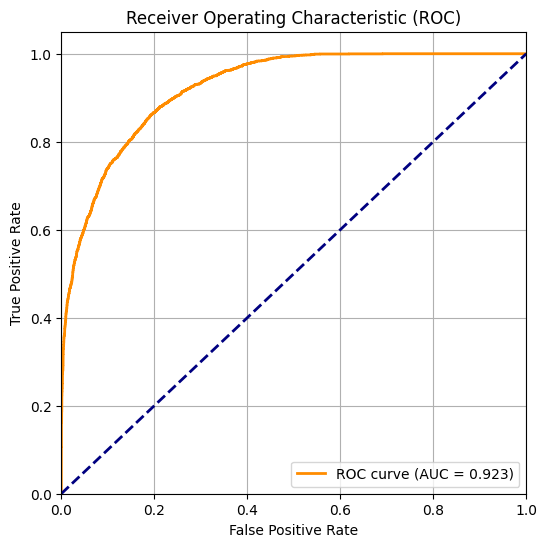

In [25]:

def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = %0.3f)" % roc_auc)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")  # random guess line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

plot_roc_curve(y_test, y_pred_proba)


<h2> Conclusion

XGBoost model shows strong performance with a test log loss of 0.3315 and a ROC-AUC of 0.923, indicating both well-calibrated probability estimates and excellent class separation. The small gap between CV and test log loss confirms good generalization, while the confusion matrix highlights balanced and reliable predictions. Overall, this model is a robust and production-ready baseline that already outperforms simpler classifiers, with further improvements possible through feature engineering or ensembling